To build a network that can effectively predict stock prices is an unrealistic goal, but a fun challenge nevertheless. There are a few different paths one could take to build the model, and we shall start from the easy and then move on the challenging.
I would like to test                   

*   training on historic data of just 1 company v/s training on data of multiple companies of a sector
*   try predicting pattern for different companies using models of other sectors(i.e. see if the patterns that the model memorizes work for all stocks, or stocks of that specific set of companies only.)
*    train an nlp for sentiment analysis of news regarding a particular company, and correlate the effect it has on its stock price
*    combine the multiple branches under one model and train it with reinforcement learning and make it self-sustaining by letting it automatically update information and train itself periodically.

LETS GO!!!

In [ ]:
#Start by importing necessary libraries
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM, GRU
plt.style.use('dark_background')

In this model, we shall test the effectivesness of training on just 1 company, and predicting stock value, while also testing if having 1 or multiple inputs has an effective change on the accuracy of our model.

In [ ]:
#import data of company
company_data = pd.read_csv('ASIAN PAINTS.csv')
company_data

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,01-Aug-02,327.00,331.70,321.00,323.30,325.180594,3267,118,1062365,2385.0,73.00,10.70,-3.70
1,02-Aug-02,324.50,327.00,324.50,326.75,325.985878,1133,56,369342,1062.0,93.73,2.50,2.25
2,05-Aug-02,325.00,332.25,322.50,330.40,329.184697,2274,79,748566,1187.0,52.20,9.75,5.40
3,06-Aug-02,328.65,333.75,328.65,332.80,332.604433,1173,50,390145,1020.0,86.96,5.10,4.15
4,07-Aug-02,332.00,333.95,330.00,332.20,331.998122,1597,144,530201,829.0,51.91,3.95,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,26-Jul-22,3099.90,3149.95,3053.00,3107.60,3099.789458,128929,11992,399652755,42942.0,33.31,96.95,7.70
4967,27-Jul-22,3138.00,3191.90,3097.80,3185.45,3145.272796,54330,5197,170882671,15804.0,29.09,94.10,47.45
4968,28-Jul-22,3195.00,3279.50,3184.20,3263.20,3246.921921,60631,4424,196864123,15432.0,25.45,95.30,68.20
4969,29-Jul-22,3280.00,3354.50,3276.75,3332.35,3321.617288,41786,4615,138797100,12846.0,30.74,77.75,52.35


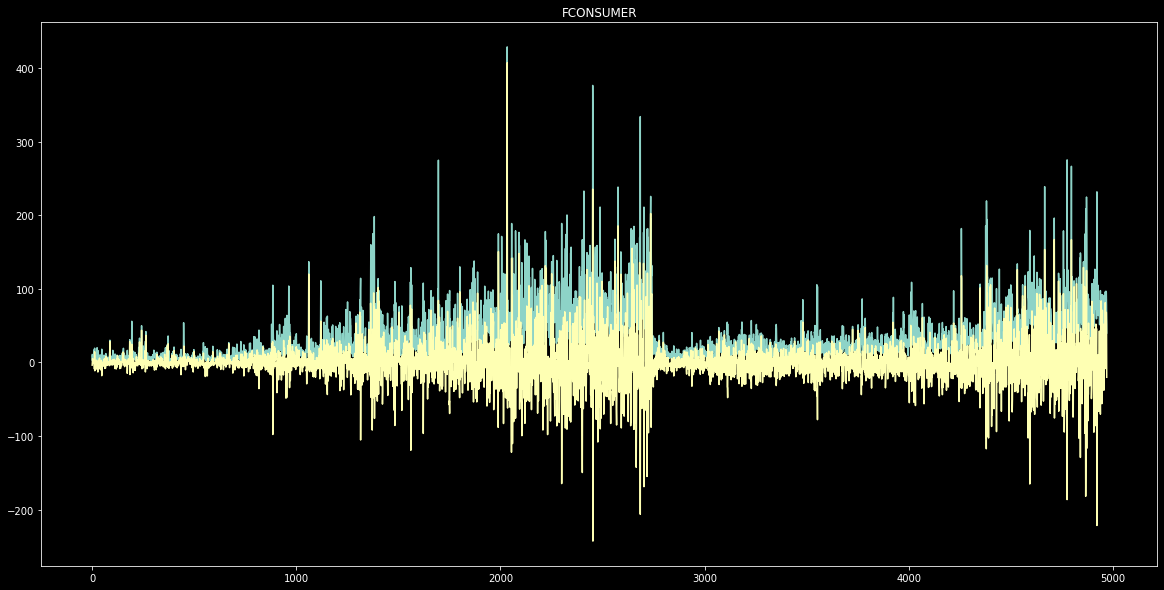

In [ ]:
t = range(len(company_data))
plt.figure(figsize=(20,10))
plt.title('FCONSUMER')
plt.plot(t, company_data['Spread High-Low'], t, company_data['Spread Close-Open'])

In [ ]:
#We now create a new dataframe with only close price
close_data = company_data.filter(['Spread Close-Open'])
#Create another dataframe with multiple inputs
multi_data = company_data.filter(['WAP', 'No.of Shares', 'No. of Trades', 'Spread High-Low', 'Spread Close-Open'])
#convert to numpy array
dataset_close = close_data.values
dataset_multi = multi_data.values
#now divide data into training(90%) and testing(10%)
training_data_len = math.ceil(len(dataset_close)*0.9)#only integer values allowed
dataset_close[training_data_len]

array([-5.85])

In [ ]:
#Scale the data to (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
multi_scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = dataset_close
multi_scaled = multi_scaler.fit_transform(dataset_multi)
scaled_data

array([[ -3.7 ],
       [  2.25],
       [  5.4 ],
       ...,
       [ 68.2 ],
       [ 52.35],
       [-20.15]])

First lets build and train the single input model

In [ ]:
#create training and testing dataset
train_data = scaled_data[:training_data_len, :]

#split training_data into x_train and y_train i.e. input and output
x_train = []
y_train = []
#Using past 50 days prices as input
for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])
#    if i<=52:
#        print(x_train)
#        print(y_train)

In [ ]:
#Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data so that it can be usesd by keras
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4374, 100, 1)

In [ ]:
#Building the LSTM model
model = Sequential()
model.add(GRU(50, return_sequences=True, batch_input_shape=(6, x_train.shape[1], 1), stateful=True))
model.add(GRU(75, return_sequences=False, stateful=True))
model.add(Dense(50))
model.add(Dense(1))


In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model and time it
import time
start = time.time()
model.fit(x_train, y_train,batch_size=6, epochs=4)
end = time.time()
print(f'Time taken to print the model = {end-start}')

Epoch 1/4
729/729 [==============================] - 51s 65ms/step - loss: 772.3735
Epoch 2/4
729/729 [==============================] - 44s 61ms/step - loss: 768.9515
Epoch 3/4
729/729 [==============================] - 45s 61ms/step - loss: 769.8320
Epoch 4/4
729/729 [==============================] - 43s 59ms/step - loss: 764.8583
Time taken to print the model = 205.21136450767517


In [ ]:
#Lets test the model
test_data = scaled_data[training_data_len-100:training_data_len, :]
x_test = test_data[:100]
y_test = dataset_close[training_data_len: ,:]

#for i in range(100, len(test_data)):
#    x_test.append(test_data[i-100:i, 0])

#Convert to numpy array
x_test = np.array(x_test)

#Reshape data
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test = np.reshape(x_test, (1, 100, 1))
x_test.shape

(1, 100, 1)

In [ ]:
#Get model predictions
for i in range(len(y_test)):
    predictions = model.predict(x_test[-100:, 0])
    predictions = np.array([predictions])
    x_test = np.append(x_test, predictions, axis=1)

In [ ]:
x_test.shape

(1, 6064, 1)

In [ ]:
#Rescale the predictions
predictions = np.reshape(x_test, (-1, 1))
#Get Error
error = np.sqrt(np.mean(((predictions[:len(y_test)]-y_test)**2)))
error

23592152.43890368

In [ ]:
predictions[:5]

array([[ 3423.75],
       [-3399.  ],
       [ 6767.2 ],
       [-6656.15],
       [ 9832.4 ]])

In [ ]:
for i in range(len(predictions)):
    if i==0:
        predictions[i] = predictions[i]+1717.15
    else:
        predictions[i] = predictions[i]-predictions[i-1]+1717.15
predictions[:5]

array([[  5140.9 ],
       [ -6822.75],
       [ 15307.1 ],
       [-20246.1 ],
       [ 31795.65]])

In [ ]:
close_data = company_data.filter(['Close Price'])
dataset = close_data.values

In [ ]:
new_list = []
for i in range(10):
    new_list.append(predictions[i])

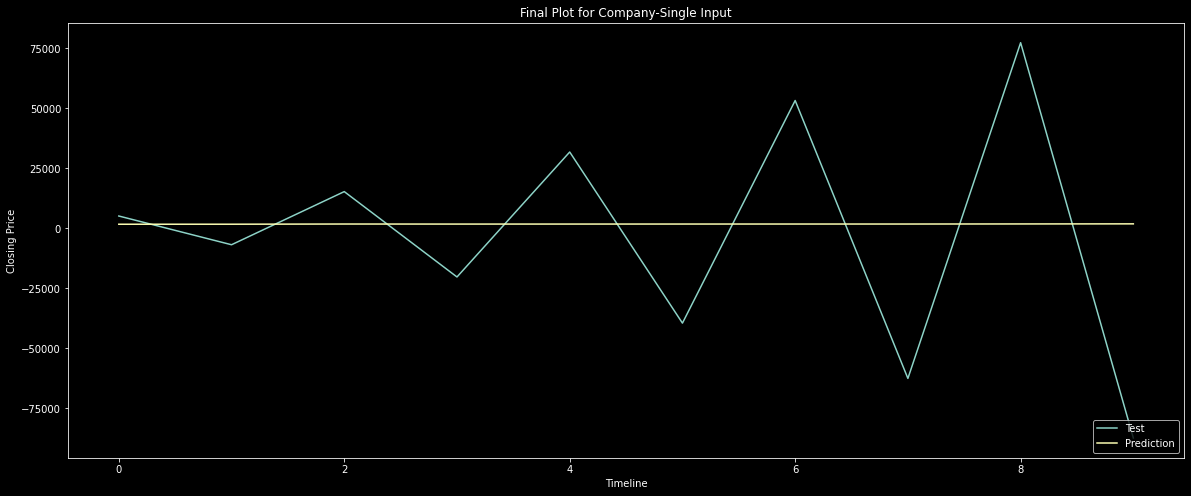

In [ ]:
#plot the prediction v/s actual prices
#y_train = scaler.inverse_transform(y_train)
#trainplt = close_data[:training_data_len]
testplt = dataset[training_data_len:training_data_len+10]
predplt = new_list
#Visualize
plt.figure(figsize=(20, 8))
plt.title('Final Plot for Company-Single Input')
plt.xlabel('Timeline')
plt.ylabel('Closing Price')
plt.plot(predplt)
plt.plot(testplt)
plt.legend(['Test', 'Prediction'], loc='lower right')
plt.show()

In [ ]:
#reasonable estimate
days=0
for i in np.sqrt((predictions[:len(y_test)]-y_test)**2):
    if i<1:
        days+=1
print(days)

15


In [ ]:
model.save('Single input model')